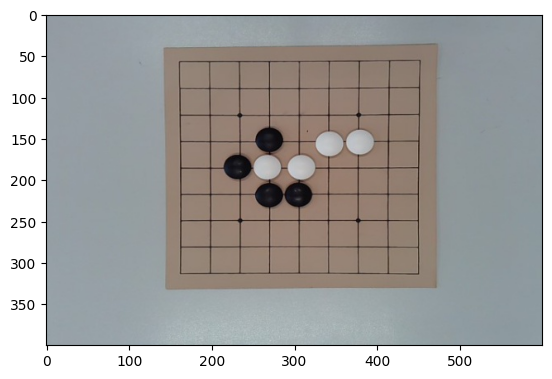

In [16]:
import gobanana as gb
import cv2
import numpy as np
from matplotlib import pyplot as plt



original_image = cv2.imread('test_image.jpg')
#Show the image with matplotlib
original_image =  np.flip(original_image, -1)     # Convert from BGR to RGB
plt.imshow(original_image )
plt.show()

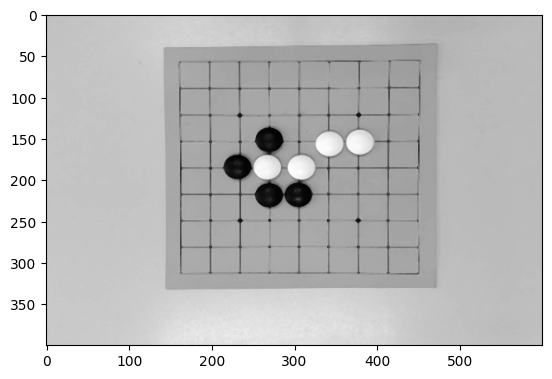

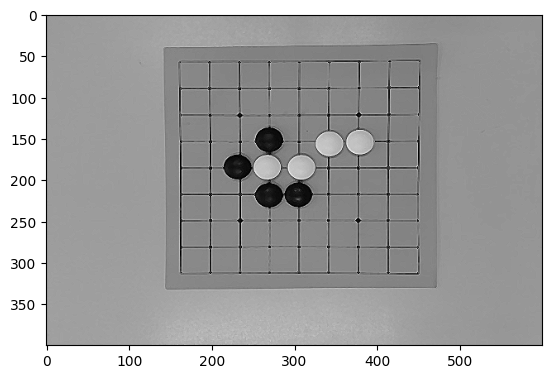

In [26]:
grey = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)
blur = cv2.medianBlur(grey, 3)
sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharpen = cv2.filter2D(blur, -1, sharpen_kernel)

# plt.imshow(blur, cmap='gray')
plt.show()
plt.imshow(sharpen, cmap='gray')


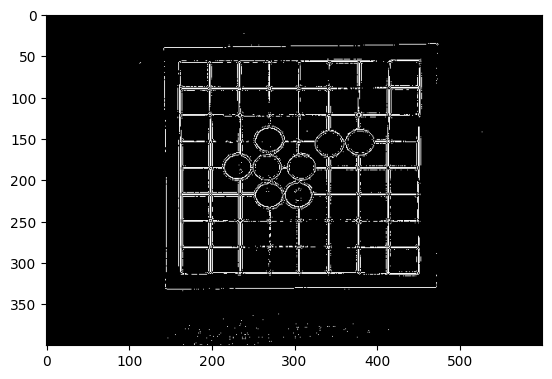

In [24]:
# Threshold and morph close
thresh = cv2.adaptiveThreshold(sharpen,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,3,10)

plt.imshow(thresh, cmap='gray')
plt.show()



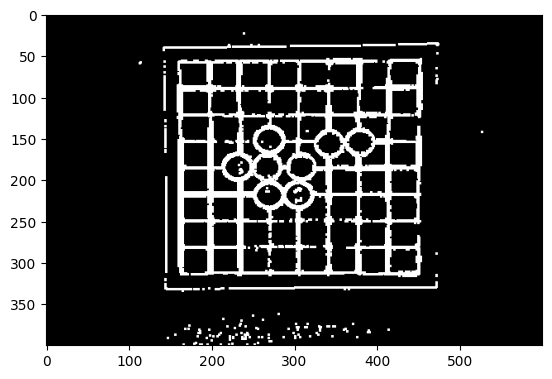

In [39]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
dilation = cv2.dilate(thresh, kernel,iterations = 1)
plt.imshow(dilation, cmap='gray')

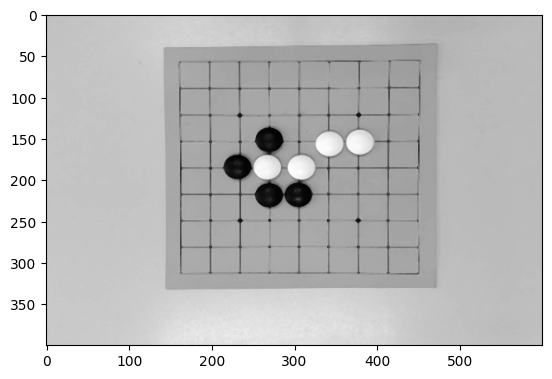

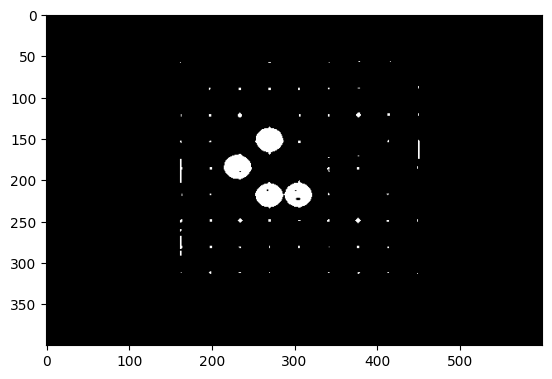

In [102]:
plt.imshow(blur, cmap='gray')
plt.show()

black_mask = cv2.adaptiveThreshold(blur, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,251,70)
plt.imshow(black_mask, cmap='gray')

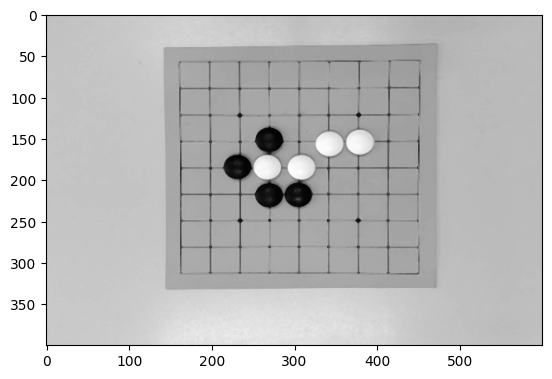

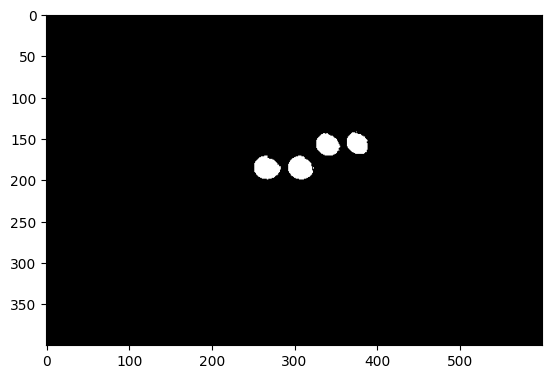

In [30]:
plt.imshow(blur, cmap='gray')
plt.show()

white_mask = cv2.adaptiveThreshold(blur, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,451,-48)

plt.imshow(white_mask, cmap='gray')

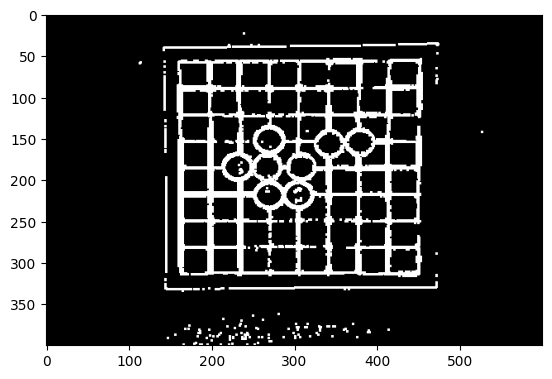

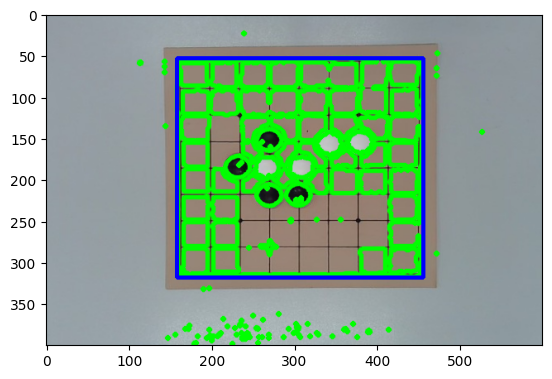

In [93]:
dilation = cv2.dilate(thresh, kernel,iterations = 1)
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

rects = []
# image = original_image.transpose((1, 2, 0)).astype(np.uint8).copy() ##original_image[:]
image = np.ascontiguousarray(original_image, dtype=np.uint8)
plt.imshow(dilation, cmap='gray')
plt.show()
for c in contours:
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)
    if (0.7 < (max(w,h) / min(w,h)) < 1.3):          
        rects.append(((x,y,w,h), area))
        cv2.drawContours(image, [c], 0, (0,255,0), cv2.LINE_4, 10) # 4, hierarchy)
    # print(c)

# plt.imshow(original_image)
plt.show()
plt.imshow(image)
rects.sort(key = lambda x: x[1], reverse = True)
x1, y1 = rects[0][0][0],  rects[0][0][1]
x2, y2 = x1+ rects[0][0][2], y1+ rects[0][0][3]

cv2.rectangle(image,(x1, y1),(x2,y2),(0,0,255),3)
plt.imshow(image)
